<a href="https://colab.research.google.com/github/uervitonsantos/analise_acoes_mercado_financeiro_bovespa/blob/main/analise_de_acoes_bovespa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn

In [2]:
import requests
import pprint
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import os
import datetime
import locale
from datetime import datetime

In [3]:
!dpkg-reconfigure locales

Generating locales (this might take a while)...
  en_US.UTF-8... done
  pt_BR.ISO-8859-1... done
Generation complete.


In [4]:
# Install locale pt_BR
!/usr/share/locales/install-language-pack pt_BR

Generating locales (this might take a while)...
Generation complete.
dpkg-trigger: error: must be called from a maintainer script (or with a --by-package option)

Type dpkg-trigger --help for help about this utility.


In [5]:
print(locale.getlocale())

('en_US', 'UTF-8')


In [6]:
locale.setlocale(locale.LC_ALL, 'pt_BR.iso88591')

'pt_BR.iso88591'

In [7]:
chaveAPI = "55LFJVBVIMDQ5T3C"
LOCAL = f".SAO"
ACAO = f"KLBN4{LOCAL}"

In [8]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={ACAO}&apikey={chaveAPI}'
r = requests.get(url)
data = r.json()
pprint.pprint(data)

{'Global Quote': {'01. symbol': 'KLBN4.SAO',
                  '02. open': '4.2100',
                  '03. high': '4.2900',
                  '04. low': '4.2100',
                  '05. price': '4.2400',
                  '06. volume': '2838700',
                  '07. latest trading day': '2023-12-19',
                  '08. previous close': '4.2200',
                  '09. change': '0.0200',
                  '10. change percent': '0.4739%'}}


In [9]:
# Configurar a formatação da moeda
def format_currency(value, _):
    return locale.currency(value, grouping=True)

In [11]:
# Extrair os dados relevantes
symbol = data['Global Quote']['01. symbol']
open_price = float(data['Global Quote']['02. open'])
close_price = float(data['Global Quote']['05. price'])
volume = int(data['Global Quote']['06. volume'])
latest_trading_day = data['Global Quote']['07. latest trading day']

In [12]:
# Obtenha a data como um objeto datetime
trading_day_date = datetime.strptime(latest_trading_day, '%Y-%m-%d')

# Formate a data de acordo com a localidade
latest_trading_day = trading_day_date.strftime('%d-%m-%Y')

In [13]:
# Converter o volume para reais
closing_price_per_unit = close_price  # Poderia ser outro preço, dependendo do contexto
volume_in_reais = volume / 4.87
# volume_in_reais = locale.currency(volume_in_reais, grouping=True)
# print('Dinheiro formatado para Real: ', volume_in_reais)

In [14]:
# Criar um DataFrame do pandas para facilitar a manipulação dos dados
df = pd.DataFrame({'Symbol': [symbol],
                   'Open': [open_price],
                   'Close': [close_price],
                   'Volume': [volume],
                   'VolumeEmReais': [volume_in_reais],
                   'Latest Trading Day': [latest_trading_day]})

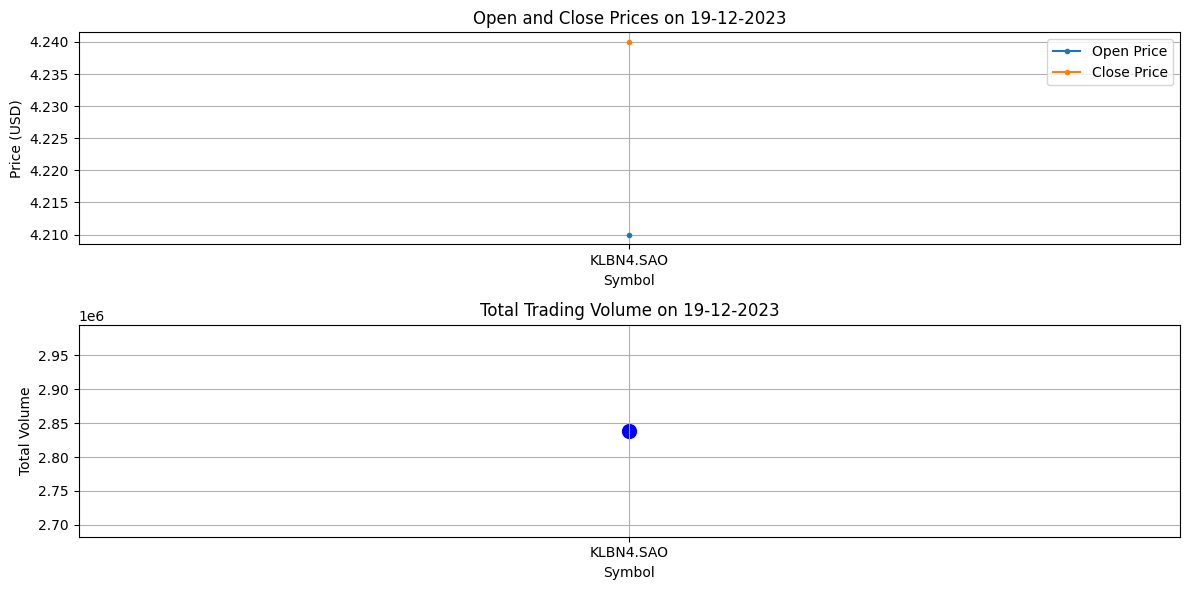

In [15]:
# Plotar o gráfico
plt.figure(figsize=(12, 6))

# Gráfico de preços de abertura e fechamento
plt.subplot(2, 1, 1)
plt.plot(df['Symbol'], df['Open'], label='Open Price', marker='.')
plt.plot(df['Symbol'], df['Close'], label='Close Price', marker='.')
plt.title('Open and Close Prices on {}'.format(latest_trading_day))
plt.xlabel('Symbol')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

# Gráfico de volume (ponto único)
plt.subplot(2, 1, 2)
plt.scatter(df['Symbol'], df['Volume'], color='blue', s=100)
plt.title('Total Trading Volume on {}'.format(latest_trading_day))
plt.xlabel('Symbol')
plt.ylabel('Total Volume')
plt.grid(True)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

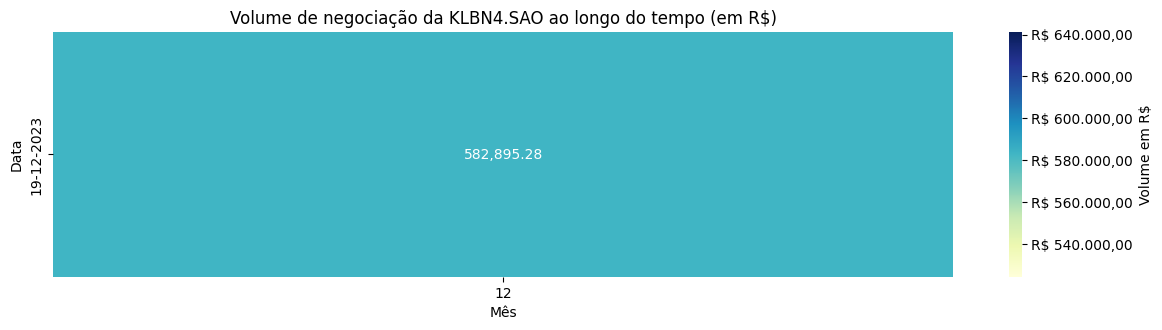

In [16]:
# Plotar o gráfico
plt.figure(figsize=(12, 6))

# Gráfico de volume (heatmap)
plt.subplot(2, 1, 2)

# Adicionar uma coluna de mês ao DataFrame
df['Month'] = pd.to_datetime(df['Latest Trading Day'], format='%d-%m-%Y').dt.month
heatmap_data = df.pivot_table(values='VolumeEmReais', index='Latest Trading Day', columns='Month', aggfunc='sum')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=',.2f', cbar_kws={'format': FuncFormatter(format_currency), 'label': 'Volume em R$'})
plt.title(f'Volume de negociação da {ACAO} ao longo do tempo (em R$)')
plt.xlabel('Mês')
plt.ylabel('Data')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()